In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import nltk
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction.text import TfidfVectorizer

import time

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier

import xgboost

In [3]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [2]:
df = pd.read_csv('/content/SMSSpamCollection', sep='\t', header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.columns = ['type', 'text']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.duplicated().sum()

403

In [4]:
df.drop_duplicates(inplace=True)

In [7]:
df['type'].value_counts()

type
ham     4516
spam     653
Name: count, dtype: int64

In [9]:
df['type'].value_counts()/df.shape[0]

type
ham     0.87367
spam    0.12633
Name: count, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size=0.2, stratify=df['type'], random_state=42)

In [11]:
y_train.value_counts()/len(y_train)

type
ham     0.873761
spam    0.126239
Name: count, dtype: float64

In [12]:
y_test.value_counts()/len(y_test)

type
ham     0.873308
spam    0.126692
Name: count, dtype: float64

In [13]:
X_train

336         Ta-Daaaaa! I am home babe, are you still up ?
390       Yup having my lunch buffet now.. U eat already?
582        Ok anyway no need to change with what you said
1387                          All e best 4 ur exam later.
1095    Now only i reached home. . . I am very tired n...
                              ...                        
607     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
105          Umma my life and vava umma love you lot dear
3788                          WHORE YOU ARE UNBELIEVABLE.
1911    Becoz its  &lt;#&gt;  jan whn al the post ofic...
3740                           Did you stitch his trouser
Name: text, Length: 4135, dtype: object

In [6]:
df_train = pd.DataFrame({'text': X_train, 'type': y_train}, index=X_train.index)
df_test = pd.DataFrame({'text': X_test, 'type': y_test}, index=X_test.index)

In [15]:
df_train[df_train['type']=='ham']['text'].sample(20).values

array(['Call me when you get the chance plz &lt;3',
       'Hey now am free you can call me.',
       'It will stop on itself. I however suggest she stays with someone that will be able to give ors for every stool.',
       'All done? All handed in? Celebrations in full swing yet?',
       'Otherwise had part time job na-tuition..',
       'Well. Im computerless. Time to make some oreo truffles',
       'Becoz its  &lt;#&gt;  jan whn al the post ofice is in holiday so she cn go fr the post ofice...got it duffer',
       'Its just the effect of irritation. Just ignore it',
       'Right it wasnt you who phoned it was someone with a number like yours!',
       'HARD BUT TRUE: How much you show &amp;  express your love to someone....that much it will hurt when they leave you or you get seperated...!鈥┾??〨ud evening...',
       'I wish u were here. I feel so alone',
       'Yep. I do like the pink furniture tho.',
       'Ugh. Gotta drive back to sd from la. My butt is sore.',
       'One o

In [16]:
df_train[df_train['type']=='spam']['text'].sample(20).values

array(['Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?',
       'Do you want a new Video phone? 600 anytime any network mins 400 Inclusive Video calls AND downloads 5 per week Free delTOMORROW call 08002888812 or reply NOW',
       'FREEMSG: Our records indicate you may be entitled to 3750 pounds for the Accident you had. To claim for free reply with YES to this msg. To opt out text STOP',
       'Ringtone Club: Gr8 new polys direct to your mobile every week !',
       "Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'",
       'You have 1 new message. Call 0207-083-6089',
       'Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394514 From Landline DATEBox1282EssexCM61XN 150p/min 18',
       '<Forwarded from 21870000>Hi - this is your Mailb

In [7]:
df_train['character_count'] = df_train['text'].apply(len)
df_train['uppercase_count'] = df_train['text'].apply(lambda x: sum(1 for char in x if char.isupper()))
df_train['digit_count'] = df_train['text'].apply(lambda x: sum(1 for char in x if char.isdigit()))
df_train['punctuation_count'] = df_train['text'].apply(lambda x: sum(1 for char in x if char in string.punctuation))
df_train['exclamation_count'] = df_train['text'].apply(lambda x: sum(1 for char in x if char=='!'))

df_train['uppercase_perc'] = df_train['uppercase_count'] / df_train['character_count']
df_train['digit_perc'] = df_train['digit_count'] / df_train['character_count']
df_train['punctuation_perc'] = df_train['punctuation_count'] / df_train['character_count']
df_train['exclamation_perc'] = df_train['exclamation_count'] / df_train['character_count']

In [18]:
df_train

,text,type,character_count,uppercase_count,digit_count,punctuation_count,exclamation_count,uppercase_perc,digit_perc,punctuation_perc,exclamation_perc
336,"Ta-Daaaaa! I am home babe, are you still up ?",ham,45,3,0,4,1,0.066667,0.000000,0.088889,0.022222
390,Yup having my lunch buffet now.. U eat already?,ham,47,2,0,3,0,0.042553,0.000000,0.063830,0.000000
582,Ok anyway no need to change with what you said,ham,46,1,0,0,0,0.021739,0.000000,0.000000,0.000000
1387,All e best 4 ur exam later.,ham,27,1,1,1,0,0.037037,0.037037,0.037037,0.000000
1095,Now only i reached home. . . I am very tired n...,ham,71,3,0,5,0,0.042254,0.000000,0.070423,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
607,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,spam,135,79,27,8,3,0.585185,0.200000,0.059259,0.022222
105,Umma my life and vava umma love you lot dear,ham,44,1,0,0,0,0.022727,0.000000,0.000000,0.000000
3788,WHORE YOU ARE UNBELIEVABLE.,ham,27,23,0,1,0,0.851852,0.000000,0.037037,0.000000
1911,Becoz its &lt;#&gt; jan whn al the post ofic...,ham,108,1,0,8,0,0.009259,0.000000,0.074074,0.000000


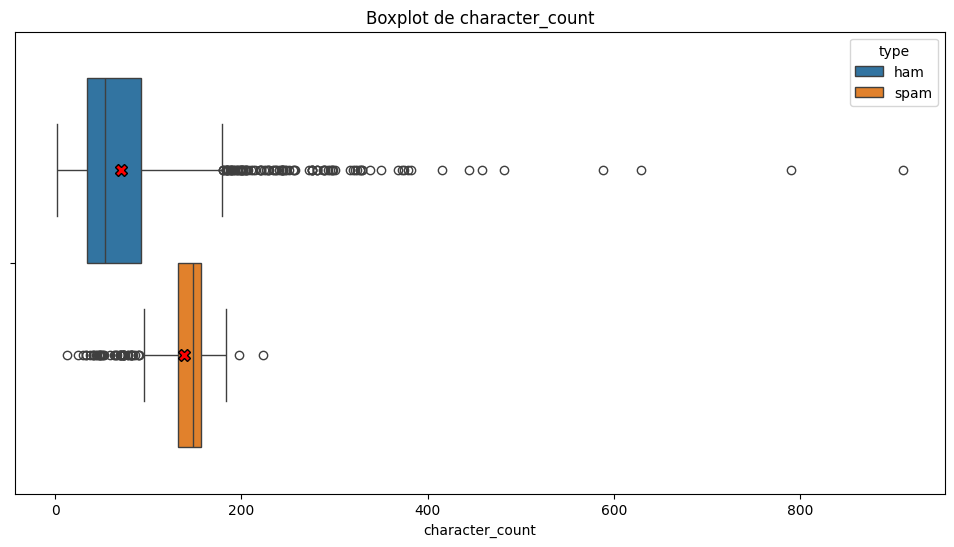

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='character_count', hue='type', showmeans=True,
            meanprops={'marker':'X',
                       'markerfacecolor':'red',
                       'markeredgecolor':'black',
                       'markersize':'8'})
plt.title('Boxplot de character_count')
plt.show()

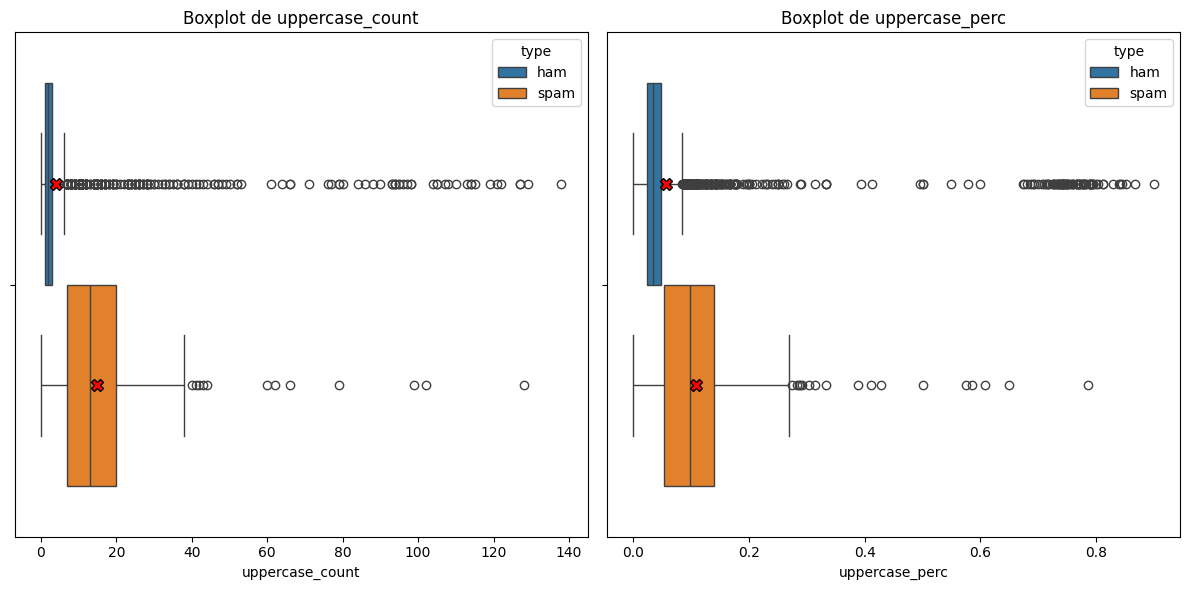

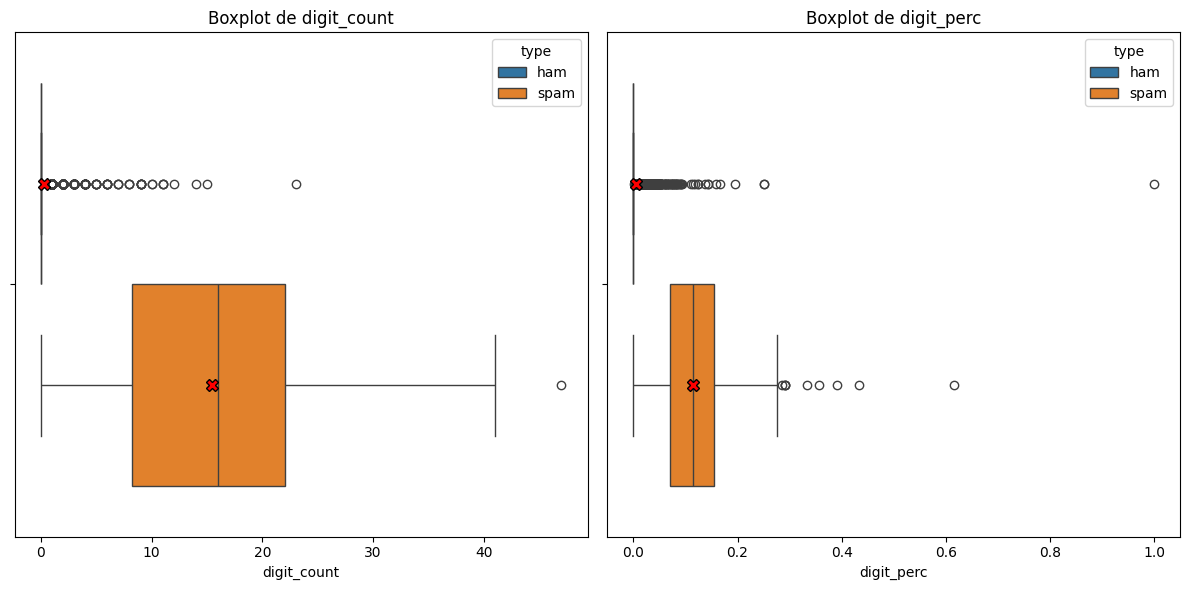

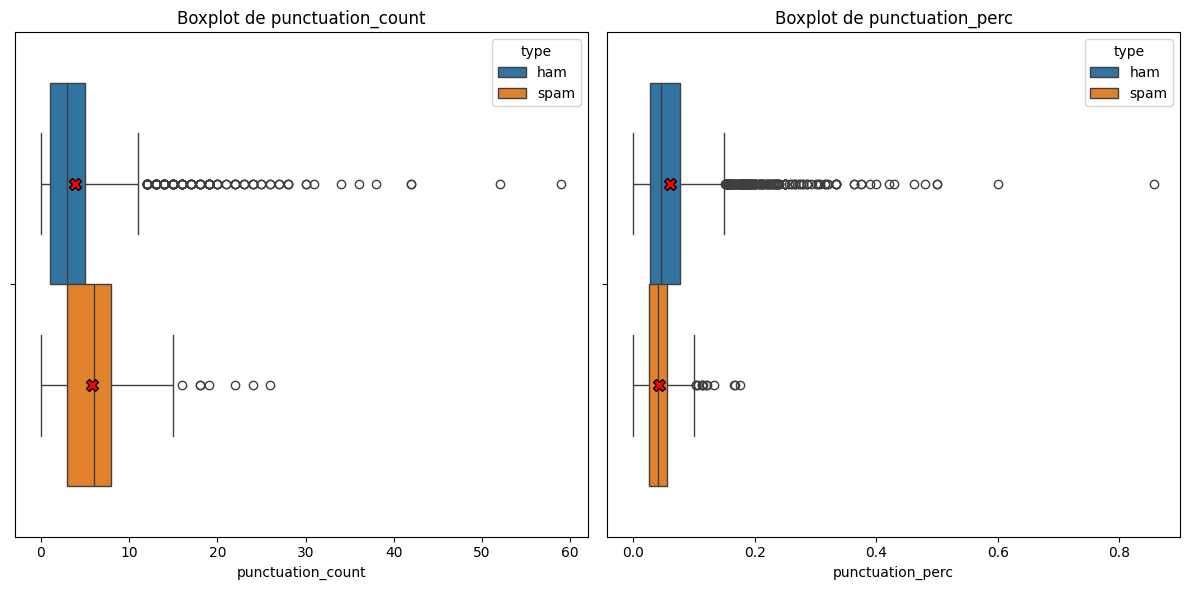

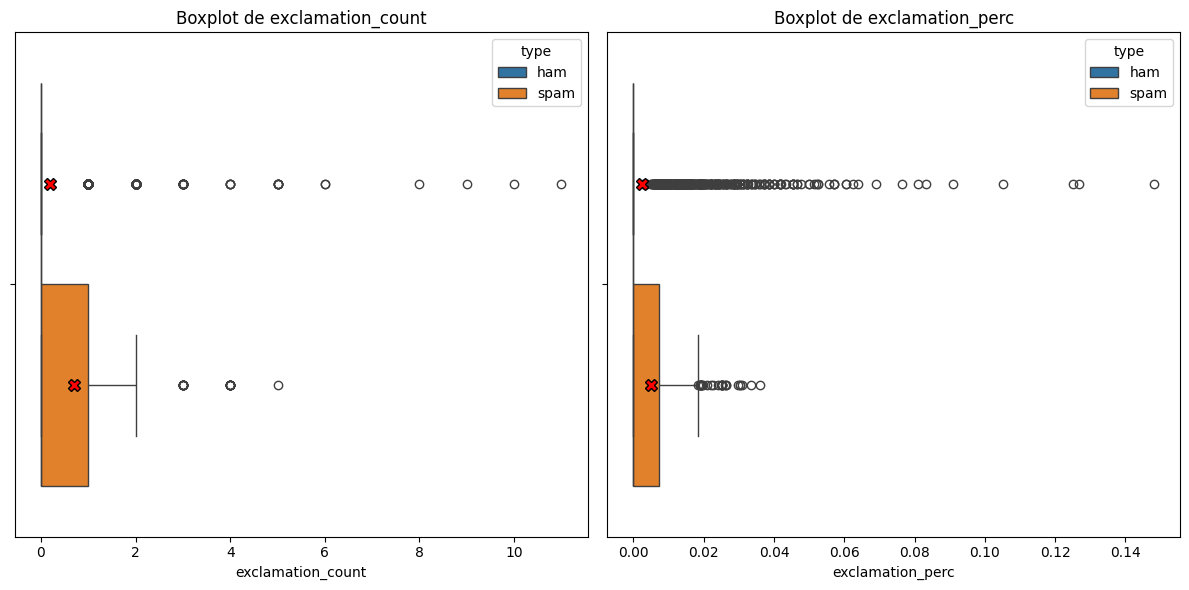

In [30]:
columns = [['uppercase_count', 'uppercase_perc'], ['digit_count', 'digit_perc'], ['punctuation_count', 'punctuation_perc'],
           ['exclamation_count', 'exclamation_perc']]


for variables in columns:
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  sns.boxplot(data=df_train, x=variables[0], hue='type', ax=ax[0],showmeans=True,
              meanprops={'marker':'X',
                        'markerfacecolor':'red',
                        'markeredgecolor':'black',
                        'markersize':'8'})
  ax[0].set_title(f'Boxplot de {variables[0]}')

  sns.boxplot(data=df_train, x=variables[1], hue='type', ax=ax[1],showmeans=True,
              meanprops={'marker':'X',
                        'markerfacecolor':'red',
                        'markeredgecolor':'black',
                        'markersize':'8'})
  ax[1].set_title(f'Boxplot de {variables[1]}')

  plt.tight_layout()
  plt.show()

In [15]:
df_train['text_modified'] = df_train['text'].apply(lambda x: re.sub("(\.\s*\.[\s*\.*]*)", "... ", x))

In [16]:
df_train['triple_points_count'] = df_train['text_modified'].apply(lambda x: len(re.findall("\.\.\.", x)))

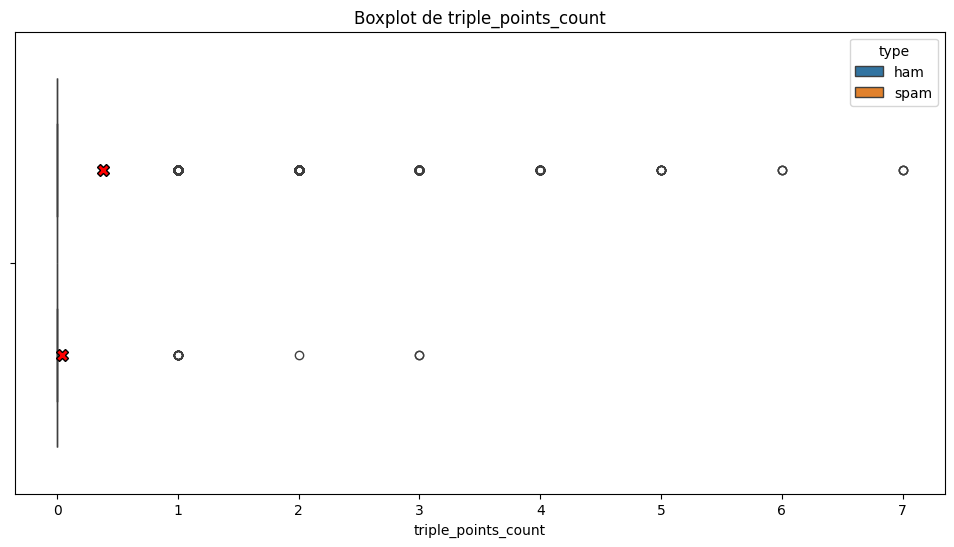

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='triple_points_count', hue='type', showmeans=True,
            meanprops={'marker':'X',
                       'markerfacecolor':'red',
                       'markeredgecolor':'black',
                       'markersize':'8'})
plt.title('Boxplot de triple_points_count')
plt.show()

In [14]:
def text_cleaning(text):
  tokens = nltk.word_tokenize(text.lower())

  tokens_clean = []
  for words in tokens:
    if words not in nltk.corpus.stopwords.words("english") and words not in string.punctuation and not words.isdigit():
      tokens_clean.append(words)

  return " ".join(tokens_clean)

In [16]:
df_train['text_cleaned'] = df_train['text_modified'].apply(text_cleaning)
df_train

,text,type,character_count,uppercase_count,digit_count,punctuation_count,exclamation_count,uppercase_perc,digit_perc,punctuation_perc,exclamation_perc,text_modified,triple_points_count,text_cleaned
336,"Ta-Daaaaa! I am home babe, are you still up ?",ham,45,3,0,4,1,0.066667,0.000000,0.088889,0.022222,"Ta-Daaaaa! I am home babe, are you still up ?",0,ta-daaaaa home babe still
390,Yup having my lunch buffet now.. U eat already?,ham,47,2,0,3,0,0.042553,0.000000,0.063830,0.000000,Yup having my lunch buffet now... U eat already?,1,yup lunch buffet ... u eat already
582,Ok anyway no need to change with what you said,ham,46,1,0,0,0,0.021739,0.000000,0.000000,0.000000,Ok anyway no need to change with what you said,0,ok anyway need change said
1387,All e best 4 ur exam later.,ham,27,1,1,1,0,0.037037,0.037037,0.037037,0.000000,All e best 4 ur exam later.,0,e best ur exam later
1095,Now only i reached home. . . I am very tired n...,ham,71,3,0,5,0,0.042254,0.000000,0.070423,0.000000,Now only i reached home... I am very tired now...,2,reached home ... tired ... come tomorro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,spam,135,79,27,8,3,0.585185,0.200000,0.059259,0.022222,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,0,xclusive clubsaisai 2morow 28/5 soiree special...
105,Umma my life and vava umma love you lot dear,ham,44,1,0,0,0,0.022727,0.000000,0.000000,0.000000,Umma my life and vava umma love you lot dear,0,umma life vava umma love lot dear
3788,WHORE YOU ARE UNBELIEVABLE.,ham,27,23,0,1,0,0.851852,0.000000,0.037037,0.000000,WHORE YOU ARE UNBELIEVABLE.,0,whore unbelievable
1911,Becoz its &lt;#&gt; jan whn al the post ofic...,ham,108,1,0,8,0,0.009259,0.000000,0.074074,0.000000,Becoz its &lt;#&gt; jan whn al the post ofic...,1,becoz lt gt jan whn al post ofice holiday cn g...


In [17]:
nlp = spacy.load('en_core_web_sm')

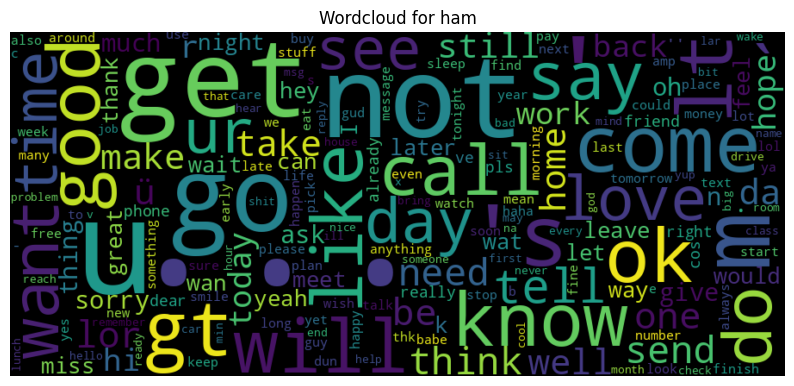

In [18]:
wordcloud = WordCloud(width=900, height=400, max_font_size=200, min_font_size=10)

tokens_list = []
for text in df_train[df_train['type']=='ham']['text_cleaned']:
  tokens_list += [token.lemma_ for token in nlp(text)]

dico = nltk.FreqDist(tokens_list)
wordcloud.generate_from_frequencies(dico)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Wordcloud for ham')
plt.show()

In [19]:
df_freq = pd.DataFrame.from_dict(dico, orient='index')
df_freq.columns = ['freq']
df_freq.sort_values('freq', ascending=False).head(50)

,freq
...,1359
u,716
not,519
get,462
go,432
',425
m,373
's,281
come,233
gt,217


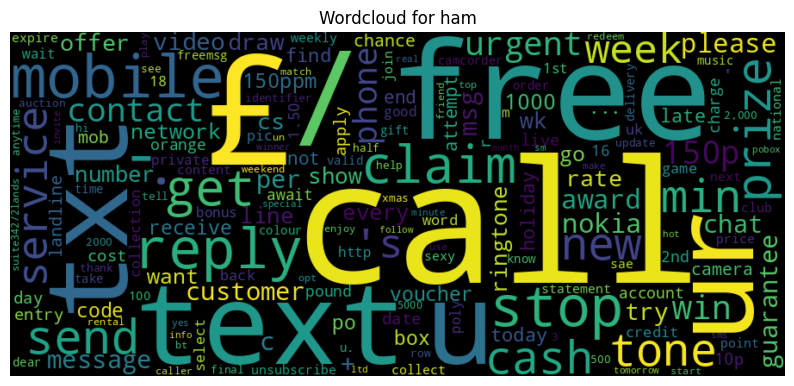

In [20]:
wordcloud = WordCloud(width=900, height=400, max_font_size=200, min_font_size=10)

tokens_list = []
for text in df_train[df_train['type']=='spam']['text_cleaned']:
  tokens_list += [token.lemma_ for token in nlp(text)]

dico = nltk.FreqDist(tokens_list)
wordcloud.generate_from_frequencies(dico)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Wordcloud for ham')
plt.show()

In [21]:
df_freq = pd.DataFrame.from_dict(dico, orient='index')
df_freq.columns = ['freq']
df_freq.sort_values('freq', ascending=False).head(50)

,freq
call,257
£,202
free,153
/,149
txt,108
text,106
u,106
ur,105
mobile,96
-,94


In [28]:
df_train['lemmatizing_text_cleaned'] = df_train['text_cleaned'].apply(lambda x: str(nlp(x)))
df_train

,text,type,character_count,uppercase_count,digit_count,punctuation_count,exclamation_count,uppercase_perc,digit_perc,punctuation_perc,exclamation_perc,text_modified,triple_points_count,text_cleaned,lemmatizing_text_cleaned
336,"Ta-Daaaaa! I am home babe, are you still up ?",ham,45,3,0,4,1,0.066667,0.000000,0.088889,0.022222,"Ta-Daaaaa! I am home babe, are you still up ?",0,ta-daaaaa home babe still,ta-daaaaa home babe still
390,Yup having my lunch buffet now.. U eat already?,ham,47,2,0,3,0,0.042553,0.000000,0.063830,0.000000,Yup having my lunch buffet now... U eat already?,1,yup lunch buffet ... u eat already,yup lunch buffet ... u eat already
582,Ok anyway no need to change with what you said,ham,46,1,0,0,0,0.021739,0.000000,0.000000,0.000000,Ok anyway no need to change with what you said,0,ok anyway need change said,ok anyway need change said
1387,All e best 4 ur exam later.,ham,27,1,1,1,0,0.037037,0.037037,0.037037,0.000000,All e best 4 ur exam later.,0,e best ur exam later,e best ur exam later
1095,Now only i reached home. . . I am very tired n...,ham,71,3,0,5,0,0.042254,0.000000,0.070423,0.000000,Now only i reached home... I am very tired now...,2,reached home ... tired ... come tomorro,reached home ... tired ... come tomorro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,spam,135,79,27,8,3,0.585185,0.200000,0.059259,0.022222,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,0,xclusive clubsaisai 2morow 28/5 soiree special...,xclusive clubsaisai 2morow 28/5 soiree special...
105,Umma my life and vava umma love you lot dear,ham,44,1,0,0,0,0.022727,0.000000,0.000000,0.000000,Umma my life and vava umma love you lot dear,0,umma life vava umma love lot dear,umma life vava umma love lot dear
3788,WHORE YOU ARE UNBELIEVABLE.,ham,27,23,0,1,0,0.851852,0.000000,0.037037,0.000000,WHORE YOU ARE UNBELIEVABLE.,0,whore unbelievable,whore unbelievable
1911,Becoz its &lt;#&gt; jan whn al the post ofic...,ham,108,1,0,8,0,0.009259,0.000000,0.074074,0.000000,Becoz its &lt;#&gt; jan whn al the post ofic...,1,becoz lt gt jan whn al post ofice holiday cn g...,becoz lt gt jan whn al post ofice holiday cn g...


In [30]:
tfidf = TfidfVectorizer()
tfidf.fit(df_train['lemmatizing_text_cleaned'])

TfidfVectorizer()

In [31]:
tfidf.transform(df_train['lemmatizing_text_cleaned'])

<4135x7272 sparse matrix of type '<class 'numpy.float64'>'
	with 34495 stored elements in Compressed Sparse Row format>

In [34]:
df_train.columns

Index(['text', 'type', 'character_count', 'uppercase_count', 'digit_count',
       'punctuation_count', 'exclamation_count', 'uppercase_perc',
       'digit_perc', 'punctuation_perc', 'exclamation_perc', 'text_modified',
       'triple_points_count', 'text_cleaned', 'lemmatizing_text_cleaned'],
      dtype='object')

In [37]:
from scipy.sparse import hstack

sparse_matrix = tfidf.transform(df_train['lemmatizing_text_cleaned'])

new_features = df_train[['character_count', 'uppercase_perc', 'digit_perc',
                         'punctuation_perc', 'exclamation_perc', 'triple_points_count']]

extended_sparse_matrix = hstack([sparse_matrix, new_features])

In [38]:
sparse_matrix

<4135x7272 sparse matrix of type '<class 'numpy.float64'>'
	with 34495 stored elements in Compressed Sparse Row format>

In [39]:
extended_sparse_matrix

<4135x7278 sparse matrix of type '<class 'numpy.float64'>'
	with 49082 stored elements in COOrdinate format>

In [29]:
def model_testing(scalers_num, models, params,
                  datasets, scoring, refit='f1', cv=5):


  df_results = pd.DataFrame(columns = ['Dataset', 'Scaler_num', 'Modèle'])

  for name, df in datasets.items():

    X = df
    y = df_train['type'].replace({'ham':0, 'spam':1})

    for scaler_num in scalers_num:
        for model in models:

          t0 = time.time()

          pipeline = make_pipeline(scaler_num, model)

          grid = GridSearchCV(pipeline, param_grid=params[pipeline.steps[1][0]], cv=cv, return_train_score=True,
                              scoring = scoring, refit = refit)

          print(name+' | '+ str(scaler_num) +' | '+pipeline.steps[1][0]+' :')

          grid.fit(X, y)

          df_grid_results = pd.DataFrame(grid.cv_results_)
          df_grid_results['Dataset'] = name
          df_grid_results['Scaler_num'] = str(scaler_num)
          df_grid_results['Modèle'] = pipeline.steps[1][0]


          df_results = pd.concat([df_results, df_grid_results], ignore_index=True)

          print("done in {:.0f} min".format((time.time() - t0)/60))
          print('-----------------------------------------------------------------------------------------')

  return df_results

In [40]:
datasets = {
    "X_train" : sparse_matrix,
    "X_train_extended" : extended_sparse_matrix
}

In [31]:
scoring = {
    "accuracy" : "accuracy",
    "precision" : "precision",
    "recall" : "recall",
    "f1" : "f1"
}

In [49]:
scalers_num = [StandardScaler(with_mean=False)]

models = [xgboost.XGBClassifier(), MLPClassifier(hidden_layer_sizes=(50, 25))]

params = {
    'xgbclassifier': {
    },
    'mlpclassifier':{

    }
}

In [53]:
df_results = model_testing(scalers_num, models, params,
                          datasets, scoring, refit='f1', cv=5)

X_train | StandardScaler(with_mean=False) | xgbclassifier :
done in 0 min
-----------------------------------------------------------------------------------------
X_train | StandardScaler(with_mean=False) | mlpclassifier :
done in 1 min
-----------------------------------------------------------------------------------------
X_train_extended | StandardScaler(with_mean=False) | xgbclassifier :
done in 0 min
-----------------------------------------------------------------------------------------
X_train_extended | StandardScaler(with_mean=False) | mlpclassifier :
done in 1 min
-----------------------------------------------------------------------------------------


In [30]:
def result_summary(df):
  columns_summary = ['Dataset', 'Scaler_num', 'Modèle', 'params', 'mean_test_f1', 'mean_train_f1', 'mean_test_accuracy', 'mean_train_accuracy', 'mean_test_precision', 'mean_train_precision', 'mean_test_recall', 'mean_train_recall', 'mean_score_time', 'mean_fit_time']

  return df[columns_summary].sort_values(by='mean_test_f1', ascending=False)

In [55]:
result_summary(df_results)

,Dataset,Scaler_num,Modèle,mean_test_f1,mean_train_f1,mean_test_accuracy,mean_train_accuracy,mean_test_precision,mean_train_precision,mean_test_recall,mean_train_recall,mean_score_time,mean_fit_time
2,X_train_extended,StandardScaler(with_mean=False),xgbclassifier,0.928184,1.000000,0.982588,1.000000,0.963231,1.000000,0.896447,1.000000,0.016386,1.760407
0,X_train,StandardScaler(with_mean=False),xgbclassifier,0.890091,0.969944,0.973640,0.992624,0.936717,0.998482,0.848553,0.943007,0.015484,1.092953
1,X_train,StandardScaler(with_mean=False),mlpclassifier,0.884344,1.000000,0.973156,1.000000,0.968562,1.000000,0.814103,1.000000,0.016358,4.781771
3,X_train_extended,StandardScaler(with_mean=False),mlpclassifier,0.882776,1.000000,0.972914,1.000000,0.970712,1.000000,0.810293,1.000000,0.014483,5.781516


In [62]:
scalers_num = [StandardScaler(with_mean=False)]

models = [xgboost.XGBClassifier(), MLPClassifier()]

params = {
    'xgbclassifier': {
    },
    'mlpclassifier':{
        'mlpclassifier__hidden_layer_sizes': [(50), (50, 25), (100, 50, 25)]
    }
}

In [63]:
df_results = model_testing(scalers_num, models, params,
                          datasets, scoring, refit='f1', cv=5)

X_train | StandardScaler(with_mean=False) | xgbclassifier :
done in 0 min
-----------------------------------------------------------------------------------------
X_train | StandardScaler(with_mean=False) | mlpclassifier :
done in 2 min
-----------------------------------------------------------------------------------------
X_train_extended | StandardScaler(with_mean=False) | xgbclassifier :
done in 0 min
-----------------------------------------------------------------------------------------
X_train_extended | StandardScaler(with_mean=False) | mlpclassifier :
done in 2 min
-----------------------------------------------------------------------------------------


In [68]:
result_summary(df_results)

,Dataset,Scaler_num,Modèle,params,mean_test_f1,mean_train_f1,mean_test_accuracy,mean_train_accuracy,mean_test_precision,mean_train_precision,mean_test_recall,mean_train_recall,mean_score_time,mean_fit_time
4,X_train_extended,StandardScaler(with_mean=False),xgbclassifier,{},0.928184,1.000000,0.982588,1.000000,0.963231,1.000000,0.896447,1.000000,0.014639,1.385559
7,X_train_extended,StandardScaler(with_mean=False),mlpclassifier,"{'mlpclassifier__hidden_layer_sizes': (100, 50...",0.910939,1.000000,0.978718,1.000000,0.963671,1.000000,0.863919,1.000000,0.016911,9.087654
3,X_train,StandardScaler(with_mean=False),mlpclassifier,"{'mlpclassifier__hidden_layer_sizes': (100, 50...",0.901322,1.000000,0.976784,1.000000,0.969079,1.000000,0.842875,1.000000,0.014695,9.814103
0,X_train,StandardScaler(with_mean=False),xgbclassifier,{},0.890091,0.969944,0.973640,0.992624,0.936717,0.998482,0.848553,0.943007,0.014193,0.949337
2,X_train,StandardScaler(with_mean=False),mlpclassifier,"{'mlpclassifier__hidden_layer_sizes': (50, 25)}",0.882466,1.000000,0.972672,1.000000,0.965958,1.000000,0.812271,1.000000,0.014522,5.079364
1,X_train,StandardScaler(with_mean=False),mlpclassifier,{'mlpclassifier__hidden_layer_sizes': 50},0.870465,1.000000,0.969528,1.000000,0.938973,1.000000,0.812198,1.000000,0.017519,4.911377
6,X_train_extended,StandardScaler(with_mean=False),mlpclassifier,"{'mlpclassifier__hidden_layer_sizes': (50, 25)}",0.864325,1.000000,0.968803,1.000000,0.956600,1.000000,0.789194,1.000000,0.011561,4.896204
5,X_train_extended,StandardScaler(with_mean=False),mlpclassifier,{'mlpclassifier__hidden_layer_sizes': 50},0.855771,1.000000,0.966385,1.000000,0.936112,1.000000,0.789212,1.000000,0.018349,5.303002


In [69]:
scalers_num = [StandardScaler(with_mean=False)]

models = [xgboost.XGBClassifier(), MLPClassifier()]

params = {
    'xgbclassifier': {
    },
    'mlpclassifier':{
        'mlpclassifier__hidden_layer_sizes': [(200, 100, 25), (500, 250, 100, 50, 25)]
    }
}

In [70]:
df_results = model_testing(scalers_num, models, params,
                          datasets, scoring, refit='f1', cv=5)

X_train | StandardScaler(with_mean=False) | xgbclassifier :
done in 0 min
-----------------------------------------------------------------------------------------
X_train | StandardScaler(with_mean=False) | mlpclassifier :
done in 5 min
-----------------------------------------------------------------------------------------
X_train_extended | StandardScaler(with_mean=False) | xgbclassifier :
done in 0 min
-----------------------------------------------------------------------------------------
X_train_extended | StandardScaler(with_mean=False) | mlpclassifier :
done in 6 min
-----------------------------------------------------------------------------------------


In [71]:
result_summary(df_results)

,Dataset,Scaler_num,Modèle,params,mean_test_f1,mean_train_f1,mean_test_accuracy,mean_train_accuracy,mean_test_precision,mean_train_precision,mean_test_recall,mean_train_recall,mean_score_time,mean_fit_time
3,X_train_extended,StandardScaler(with_mean=False),xgbclassifier,{},0.928184,1.000000,0.982588,1.000000,0.963231,1.000000,0.896447,1.000000,0.015579,1.431966
5,X_train_extended,StandardScaler(with_mean=False),mlpclassifier,"{'mlpclassifier__hidden_layer_sizes': (500, 25...",0.902775,1.000000,0.977267,1.000000,0.980505,1.000000,0.837198,1.000000,0.030402,42.376840
4,X_train_extended,StandardScaler(with_mean=False),mlpclassifier,"{'mlpclassifier__hidden_layer_sizes': (200, 10...",0.899156,0.999760,0.976058,0.999940,0.961456,0.999522,0.844799,1.000000,0.016037,18.216124
1,X_train,StandardScaler(with_mean=False),mlpclassifier,"{'mlpclassifier__hidden_layer_sizes': (200, 10...",0.895590,1.000000,0.975333,1.000000,0.961019,1.000000,0.839011,1.000000,0.026267,16.921797
0,X_train,StandardScaler(with_mean=False),xgbclassifier,{},0.890091,0.969944,0.973640,0.992624,0.936717,0.998482,0.848553,0.943007,0.016183,1.207005
2,X_train,StandardScaler(with_mean=False),mlpclassifier,"{'mlpclassifier__hidden_layer_sizes': (500, 25...",0.889461,1.000000,0.974365,1.000000,0.975005,1.000000,0.817967,1.000000,0.031297,40.421149


In [37]:
import tensorflow as tf

In [80]:
X_train, X_test, y_train, y_test = train_test_split(extended_sparse_matrix,
                                                    df_train['type'].replace({'ham':0, 'spam':1}),
                                                    test_size=0.2,
                                                    stratify=df_train['type'].replace({'ham':0, 'spam':1}),
                                                    random_state=42)

In [83]:
X_train.shape

(3308, 7278)

In [84]:
y_train.shape

(3308,)

In [85]:
y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (3308, 7278)
Shape of training labels:   (3308, 1)
Shape of test data:         (827, 7278)
Shape of test labels:       (827, 1)


In [87]:
X_train.shape[1]

7278

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import F1Score, Recall

In [93]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [96]:
model = Sequential([
    tf.keras.layers.Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=[F1Score()]
)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
52/52 [==============================] - 7s 107ms/step - loss: 0.5449 - f1_score: 0.2244 - val_loss: 0.4817 - val_f1_score: 0.2234
Epoch 2/50
52/52 [==============================] - 6s 120ms/step - loss: 0.2466 - f1_score: 0.2244 - val_loss: 0.1859 - val_f1_score: 0.2237
Epoch 3/50
52/52 [==============================] - 5s 106ms/step - loss: 0.1098 - f1_score: 0.2246 - val_loss: 0.0640 - val_f1_score: 0.2234
Epoch 4/50
52/52 [==============================] - 6s 108ms/step - loss: 0.0284 - f1_score: 0.2244 - val_loss: 0.0511 - val_f1_score: 0.2234
Epoch 5/50
52/52 [==============================] - 4s 83ms/step - loss: 0.0468 - f1_score: 0.2270 - val_loss: 0.0564 - val_f1_score: 0.2234
Epoch 6/50
52/52 [==============================] - 5s 89ms/step - loss: 0.0188 - f1_score: 0.2255 - val_loss: 0.0802 - val_f1_score: 0.2251
Epoch 7/50
52/52 [==============================] - 5s 103ms/step - loss: 0.0272 - f1_score: 0.2272 - val_loss: 0.0636 - val_f1_score: 0.2239
Epoch 8/

In [45]:
def plot_history(history):
    f1_score = history.history['f1_score']
    val_f1_score = history.history['val_f1_score']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(f1_score) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, f1_score, 'b', label='Training f1_score')
    plt.plot(x, val_f1_score, 'r', label='Validation f1_score')
    plt.title('Training and validation f1_score')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

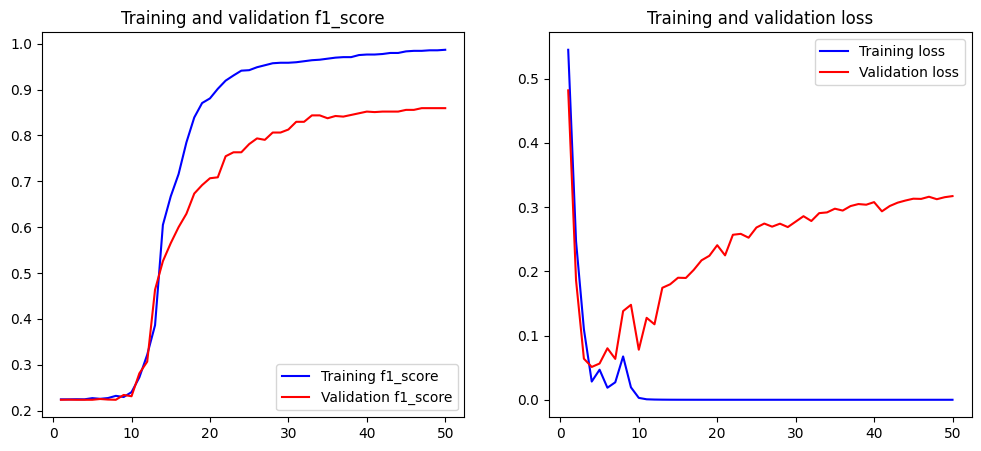

In [102]:
plot_history(history)

In [2]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.4/508.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0

In [1]:
import autokeras as ak

In [9]:
import tensorflow as tf

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_train[['text']],
                                                    df_train['type'].replace({'ham':0, 'spam':1}),
                                                    test_size=0.2,
                                                    stratify=df_train['type'].replace({'ham':0, 'spam':1}),
                                                    random_state=42)

In [10]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [18]:
X_train

array([['URGENT!: Your Mobile No. was awarded a £2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9755 BOX95QU'],
       ['Remember to ask alex about his pizza'],
       ['Call Germany for only 1 pence per minute! Call from a fixed line via access number 0844 861 85 85. No prepayment. Direct access! www.telediscount.co.uk'],
       ...,
       ["Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?"],
       ["Huh... Hyde park not in mel ah, opps, got confused... Anyway, if tt's e best choice den we juz have to take it..."],
       ['Oh... Haha... Den we shld had went today too... Gee, nvm la... Kaiez, i dun mind goin jazz oso... Scared hiphop open cant catch up... ']],
      dtype=object)

In [19]:
y_train

array([1, 0, 1, ..., 1, 0, 0])

In [20]:
X_train.shape

(3308, 1)

In [21]:
y_train.shape

(3308,)

In [11]:
clf = ak.TextClassifier(overwrite=True, max_trials=1)

In [ ]:
clf.fit(X_train, y_train, validation_data=(X_test, y_test),
        batch_size=32, epochs=4)

100%|██████████| 547/547 [00:00<00:00, 1.08MB/s]
100%|██████████| 226k/226k [00:00<00:00, 1.29MB/s]
100%|██████████| 510/510 [00:00<00:00, 1.05MB/s]
100%|██████████| 418M/418M [00:07<00:00, 61.3MB/s]



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0                 |0                 |classification_head_1/dropout
adam_weight_decay |adam_weight_decay |optimizer
2e-05             |2e-05             |learning_rate
512               |512               |text_block_1/bert_block_1/max_sequence_length

Epoch 1/4


In [ ]:
clf.fit(X_train[:100], y_train[:100], validation_data=(X_test[:20], y_test[:20]),
        batch_size=32, epochs=4)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0                 |0                 |classification_head_1/dropout
adam_weight_decay |adam_weight_decay |optimizer
2e-05             |2e-05             |learning_rate
512               |512               |text_block_1/bert_block_1/max_sequence_length

Epoch 1/4


In [9]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [10]:
from openai import OpenAI

In [11]:
import os

In [13]:
client = OpenAI(
    api_key= #api_key
)

def get_embedding(text, model="text-embedding-3-large"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [21]:
df_train['text'][:10].apply(lambda x: get_embedding(x))

336     [-0.009837258607149124, -0.015958072617650032,...
390     [-0.010360395535826683, 0.017574574798345566, ...
582     [0.0037560968194156885, 0.028239181265234947, ...
1387    [-0.025555429980158806, 0.04514949396252632, -...
1095    [-0.014218864031136036, 0.03032992035150528, 0...
5003    [-0.009771401062607765, 0.037924934178590775, ...
4664    [0.0007842821651138365, 0.02009548619389534, -...
5267    [-0.024112969636917114, 0.020289026200771332, ...
1689    [0.007560749538242817, -0.03383853659033775, 0...
3297    [0.0018708755960687995, 0.020846379920840263, ...
Name: text, dtype: object

In [22]:
df_train['text_embedding'] = df_train['text'].apply(lambda x: get_embedding(x))
df_train

,text,type,character_count,uppercase_count,digit_count,punctuation_count,exclamation_count,uppercase_perc,digit_perc,punctuation_perc,exclamation_perc,text_modified,triple_points_count,text_embedding
336,"Ta-Daaaaa! I am home babe, are you still up ?",ham,45,3,0,4,1,0.066667,0.000000,0.088889,0.022222,"Ta-Daaaaa! I am home babe, are you still up ?",0,"[-0.009844468906521797, -0.015932321548461914,..."
390,Yup having my lunch buffet now.. U eat already?,ham,47,2,0,3,0,0.042553,0.000000,0.063830,0.000000,Yup having my lunch buffet now... U eat already?,1,"[-0.010360395535826683, 0.017574574798345566, ..."
582,Ok anyway no need to change with what you said,ham,46,1,0,0,0,0.021739,0.000000,0.000000,0.000000,Ok anyway no need to change with what you said,0,"[0.0037560968194156885, 0.028239181265234947, ..."
1387,All e best 4 ur exam later.,ham,27,1,1,1,0,0.037037,0.037037,0.037037,0.000000,All e best 4 ur exam later.,0,"[-0.025555429980158806, 0.04514949396252632, -..."
1095,Now only i reached home. . . I am very tired n...,ham,71,3,0,5,0,0.042254,0.000000,0.070423,0.000000,Now only i reached home... I am very tired now...,2,"[-0.014218864031136036, 0.03032992035150528, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,spam,135,79,27,8,3,0.585185,0.200000,0.059259,0.022222,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,0,"[0.018030352890491486, 0.012253562919795513, -..."
105,Umma my life and vava umma love you lot dear,ham,44,1,0,0,0,0.022727,0.000000,0.000000,0.000000,Umma my life and vava umma love you lot dear,0,"[-0.006968048866838217, -0.0013586027780547738..."
3788,WHORE YOU ARE UNBELIEVABLE.,ham,27,23,0,1,0,0.851852,0.000000,0.037037,0.000000,WHORE YOU ARE UNBELIEVABLE.,0,"[0.029379229992628098, -0.023755032569169998, ..."
1911,Becoz its &lt;#&gt; jan whn al the post ofic...,ham,108,1,0,8,0,0.009259,0.000000,0.074074,0.000000,Becoz its &lt;#&gt; jan whn al the post ofic...,1,"[-0.012522639706730843, 0.04866231605410576, 0..."


In [23]:
df_train.to_csv('df_train.csv')

In [24]:
df_train['text_embedding']

336     [-0.009844468906521797, -0.015932321548461914,...
390     [-0.010360395535826683, 0.017574574798345566, ...
582     [0.0037560968194156885, 0.028239181265234947, ...
1387    [-0.025555429980158806, 0.04514949396252632, -...
1095    [-0.014218864031136036, 0.03032992035150528, 0...
                              ...                        
607     [0.018030352890491486, 0.012253562919795513, -...
105     [-0.006968048866838217, -0.0013586027780547738...
3788    [0.029379229992628098, -0.023755032569169998, ...
1911    [-0.012522639706730843, 0.04866231605410576, 0...
3740    [0.012674345634877682, -0.008753446862101555, ...
Name: text_embedding, Length: 4135, dtype: object

In [27]:
df_embedding = pd.concat([df_train[['text', 'type']], df_train['text_embedding'].apply(pd.Series)], axis=1)

In [36]:
df_embedding

,text,type,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
336,"Ta-Daaaaa! I am home babe, are you still up ?",ham,-0.009844,-0.015932,-0.019409,0.039005,-0.013514,0.010371,0.003086,-0.007413,...,-0.000894,0.004523,-0.001033,-0.008659,0.011610,-0.015786,0.004543,0.014867,0.007087,0.000269
390,Yup having my lunch buffet now.. U eat already?,ham,-0.010360,0.017575,-0.013949,0.011012,0.005776,-0.027112,-0.000543,0.010139,...,-0.002774,-0.000864,0.012142,-0.014367,0.007909,-0.023978,0.020057,0.006612,-0.010391,-0.007386
582,Ok anyway no need to change with what you said,ham,0.003756,0.028239,-0.017207,0.077336,-0.009373,-0.014707,-0.049018,0.016334,...,-0.024985,0.005020,0.019874,0.019493,0.013151,0.022620,-0.000564,0.010350,0.004945,0.001916
1387,All e best 4 ur exam later.,ham,-0.025555,0.045149,-0.010942,0.035517,0.052962,-0.010134,-0.025383,0.071976,...,0.005663,0.025650,-0.024347,-0.005079,-0.002926,0.001832,-0.002724,0.001058,-0.015484,0.000494
1095,Now only i reached home. . . I am very tired n...,ham,-0.014219,0.030330,0.006009,0.011518,0.001394,-0.016138,0.005474,0.041902,...,0.007980,0.049032,-0.002950,0.009845,-0.001413,0.009763,0.002048,0.014589,0.018003,-0.008021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,spam,0.018030,0.012254,-0.009046,0.027184,0.002373,0.006934,-0.009661,0.045722,...,0.022538,-0.008400,0.002525,0.001637,-0.014069,0.028276,-0.002079,0.000398,-0.011577,-0.009269
105,Umma my life and vava umma love you lot dear,ham,-0.006968,-0.001359,-0.005965,0.020831,0.004811,0.025085,-0.049850,-0.040915,...,-0.022231,-0.005241,0.004824,-0.027312,0.004141,-0.010849,-0.005711,0.005264,0.026365,0.012269
3788,WHORE YOU ARE UNBELIEVABLE.,ham,0.029379,-0.023755,-0.009073,0.026241,0.034685,-0.010172,-0.014205,0.006454,...,-0.014379,0.012946,-0.000073,0.011862,0.003743,-0.010816,0.011483,-0.012325,0.002253,0.012052
1911,Becoz its &lt;#&gt; jan whn al the post ofic...,ham,-0.012523,0.048662,0.003375,0.043833,0.013458,-0.001010,-0.005611,0.007779,...,0.009335,-0.005177,-0.026746,0.000855,0.002221,0.021611,0.022716,0.020301,-0.005679,0.019638


In [28]:
df_embedding.to_csv('df_embedding.csv')

In [32]:
datasets = {
    "X_train" : df_embedding.drop(['text', 'type'], axis=1)
}

In [33]:
scalers_num = [None]

models = [xgboost.XGBClassifier(), MLPClassifier()]

params = {
    'xgbclassifier': {
    },
    'mlpclassifier':{
    }
}

In [34]:
df_results = model_testing(scalers_num, models, params,
                          datasets, scoring, refit='f1', cv=5)

X_train | None | xgbclassifier :
done in 3 min
-----------------------------------------------------------------------------------------
X_train | None | mlpclassifier :
done in 3 min
-----------------------------------------------------------------------------------------


In [35]:
result_summary(df_results)

,Dataset,Scaler_num,Modèle,params,mean_test_f1,mean_train_f1,mean_test_accuracy,mean_train_accuracy,mean_test_precision,mean_train_precision,mean_test_recall,mean_train_recall,mean_score_time,mean_fit_time
1,X_train,None,mlpclassifier,{},0.981413,1.0,0.995405,1.0,0.996036,1.0,0.967399,1.0,0.111614,25.321720
0,X_train,None,xgbclassifier,{},0.964183,1.0,0.991294,1.0,0.997938,1.0,0.932930,1.0,0.479382,28.630438


In [52]:
df_embedding.drop(['text', 'type'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
336,-0.009844,-0.015932,-0.019409,0.039005,-0.013514,0.010371,0.003086,-0.007413,0.014400,0.031438,...,-0.000894,0.004523,-0.001033,-0.008659,0.011610,-0.015786,0.004543,0.014867,0.007087,0.000269
390,-0.010360,0.017575,-0.013949,0.011012,0.005776,-0.027112,-0.000543,0.010139,0.017034,-0.003195,...,-0.002774,-0.000864,0.012142,-0.014367,0.007909,-0.023978,0.020057,0.006612,-0.010391,-0.007386
582,0.003756,0.028239,-0.017207,0.077336,-0.009373,-0.014707,-0.049018,0.016334,0.012254,-0.022207,...,-0.024985,0.005020,0.019874,0.019493,0.013151,0.022620,-0.000564,0.010350,0.004945,0.001916
1387,-0.025555,0.045149,-0.010942,0.035517,0.052962,-0.010134,-0.025383,0.071976,0.025618,0.007785,...,0.005663,0.025650,-0.024347,-0.005079,-0.002926,0.001832,-0.002724,0.001058,-0.015484,0.000494
1095,-0.014219,0.030330,0.006009,0.011518,0.001394,-0.016138,0.005474,0.041902,0.031866,0.018812,...,0.007980,0.049032,-0.002950,0.009845,-0.001413,0.009763,0.002048,0.014589,0.018003,-0.008021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,0.018030,0.012254,-0.009046,0.027184,0.002373,0.006934,-0.009661,0.045722,-0.024553,0.040614,...,0.022538,-0.008400,0.002525,0.001637,-0.014069,0.028276,-0.002079,0.000398,-0.011577,-0.009269
105,-0.006968,-0.001359,-0.005965,0.020831,0.004811,0.025085,-0.049850,-0.040915,-0.002507,-0.019711,...,-0.022231,-0.005241,0.004824,-0.027312,0.004141,-0.010849,-0.005711,0.005264,0.026365,0.012269
3788,0.029379,-0.023755,-0.009073,0.026241,0.034685,-0.010172,-0.014205,0.006454,-0.006848,0.075980,...,-0.014379,0.012946,-0.000073,0.011862,0.003743,-0.010816,0.011483,-0.012325,0.002253,0.012052
1911,-0.012523,0.048662,0.003375,0.043833,0.013458,-0.001010,-0.005611,0.007779,-0.001182,0.007690,...,0.009335,-0.005177,-0.026746,0.000855,0.002221,0.021611,0.022716,0.020301,-0.005679,0.019638


In [53]:
df_embedding['type'].replace({'ham': 0, 'spam': 1})

336     0
390     0
582     0
1387    0
1095    0
       ..
607     1
105     0
3788    0
1911    0
3740    0
Name: type, Length: 4135, dtype: int64

In [54]:
mlp = MLPClassifier()
mlp.fit(df_embedding.drop(['text', 'type'], axis=1), df_embedding['type'].replace({'ham': 0, 'spam': 1}))

MLPClassifier()

In [57]:
f1_score(df_embedding['type'].replace({'ham': 0, 'spam': 1}), mlp.predict(df_embedding.drop(['text', 'type'], axis=1)))

1.0

In [59]:
df_test['text_embedding'] = df_test['text'].apply(lambda x: get_embedding(x))
df_test

,text,type,text_embedding
5318,"Good morning, my Love ... I go to sleep now an...",ham,"[-0.009462859481573105, -0.001031970721669495,..."
5281,"And how you will do that, princess? :)",ham,"[-0.004348081536591053, -0.006990829948335886,..."
2459,"Cool, I'll text you when I'm on the way",ham,"[0.0029389499686658382, 0.02232729271054268, -..."
1305,Your right! I'll make the appointment right now.,ham,"[-0.0006237037014216185, 0.007781314663589001,..."
5083,Aiya we discuss later lar... Pick ü up at 4 is...,ham,"[-0.02060328982770443, 0.029037384316325188, -..."
...,...,...,...
1120,"Bored of speed dating? Try SPEEDCHAT, txt SPEE...",spam,"[-0.042748674750328064, -0.012837685644626617,..."
3068,Ok. So april. Cant wait,ham,"[-0.03720072656869888, 0.0031792952213436365, ..."
813,Congratulations ur awarded either £500 of CD g...,spam,"[-0.007151707075536251, 0.02008376270532608, -..."
1560,"Single line with a big meaning::::: ""Miss anyt...",ham,"[0.011165332980453968, 0.01775674894452095, -0..."


In [60]:
df_test['text_embedding'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
5318,-0.009463,-0.001032,-0.009694,0.010432,0.024580,0.021477,0.018288,-0.018113,0.005144,-0.008819,...,0.011227,0.009169,-0.016912,-0.008550,0.010151,0.010045,-0.006798,0.002938,0.011189,0.001112
5281,-0.004348,-0.006991,-0.038105,-0.024158,0.046463,0.005995,0.013338,-0.025417,-0.029997,0.036611,...,0.005434,-0.003101,-0.029665,0.007278,0.016797,0.027258,0.003110,-0.000117,0.009623,-0.009222
2459,0.002939,0.022327,-0.019248,-0.004376,-0.019385,0.026902,-0.012161,0.019186,-0.033933,0.045752,...,-0.006738,-0.002997,0.018625,-0.012030,-0.004800,-0.003375,0.006483,-0.010235,-0.018388,-0.004341
1305,-0.000624,0.007781,-0.009684,0.046496,0.007663,-0.002428,0.025476,0.022451,0.049033,0.028323,...,-0.000631,-0.008548,0.023646,-0.021065,0.020608,-0.021242,0.014567,-0.003835,0.008113,-0.008666
5083,-0.020603,0.029037,-0.009428,-0.011740,-0.047231,0.004390,-0.006141,0.033104,0.017079,-0.001725,...,0.008607,0.006762,0.000831,-0.006126,0.034429,0.014790,0.008713,0.013495,0.001778,0.015754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,-0.042749,-0.012838,-0.015969,0.012846,-0.047622,0.053182,-0.027000,0.039151,-0.022535,0.013884,...,-0.009452,0.001519,-0.016861,0.012331,-0.001437,0.008594,0.003442,-0.011300,0.000070,0.015397
3068,-0.037201,0.003179,0.002095,0.038270,-0.015406,0.009010,-0.010608,0.084207,-0.037498,0.005025,...,-0.019388,0.000935,0.022938,0.003137,-0.007673,0.019507,0.000056,0.005163,-0.006158,-0.018704
813,-0.007152,0.020084,-0.000898,-0.004833,-0.036068,-0.027619,-0.063289,0.018993,0.015616,0.052583,...,-0.011723,-0.014392,0.007001,0.018639,0.006790,0.004759,0.027811,-0.006942,0.002739,-0.011472
1560,0.011165,0.017757,-0.000195,0.032556,0.010288,-0.010364,-0.017093,0.022414,0.014247,-0.048420,...,-0.013791,0.023367,-0.007130,0.005013,-0.011677,0.019387,-0.009431,-0.002746,0.018821,0.011110


In [61]:
f1_score(df_test['type'].replace({'ham': 0, 'spam': 1}), mlp.predict(df_test['text_embedding'].apply(pd.Series)))

0.9961685823754789

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_embedding.drop(['text', 'type'], axis=1),
                                                    df_train['type'].replace({'ham':0, 'spam':1}),
                                                    test_size=0.2,
                                                    stratify=df_train['type'].replace({'ham':0, 'spam':1}),
                                                    random_state=42)

In [40]:
y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (3308, 3072)
Shape of training labels:   (3308, 1)
Shape of test data:         (827, 3072)
Shape of test labels:       (827, 1)


In [42]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [44]:
model = Sequential([
    tf.keras.layers.Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=[F1Score()]
)

history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/300
52/52 [==============================] - 8s 85ms/step - loss: 0.1482 - f1_score: 0.2410 - val_loss: 0.0402 - val_f1_score: 0.2893
Epoch 2/300
52/52 [==============================] - 3s 49ms/step - loss: 0.0103 - f1_score: 0.2368 - val_loss: 0.0286 - val_f1_score: 0.2361
Epoch 3/300
52/52 [==============================] - 2s 38ms/step - loss: 0.0018 - f1_score: 0.2795 - val_loss: 0.0426 - val_f1_score: 0.3382
Epoch 4/300
52/52 [==============================] - 1s 28ms/step - loss: 3.2348e-04 - f1_score: 0.3729 - val_loss: 0.0379 - val_f1_score: 0.3455
Epoch 5/300
52/52 [==============================] - 2s 29ms/step - loss: 8.4763e-05 - f1_score: 0.3869 - val_loss: 0.0448 - val_f1_score: 0.4152
Epoch 6/300
52/52 [==============================] - 1s 28ms/step - loss: 3.9376e-05 - f1_score: 0.4475 - val_loss: 0.0474 - val_f1_score: 0.4561
Epoch 7/300
52/52 [==============================] - 1s 28ms/step - loss: 2.4640e-05 - f1_score: 0.4791 - val_loss: 0.0488 - val_f1_scor

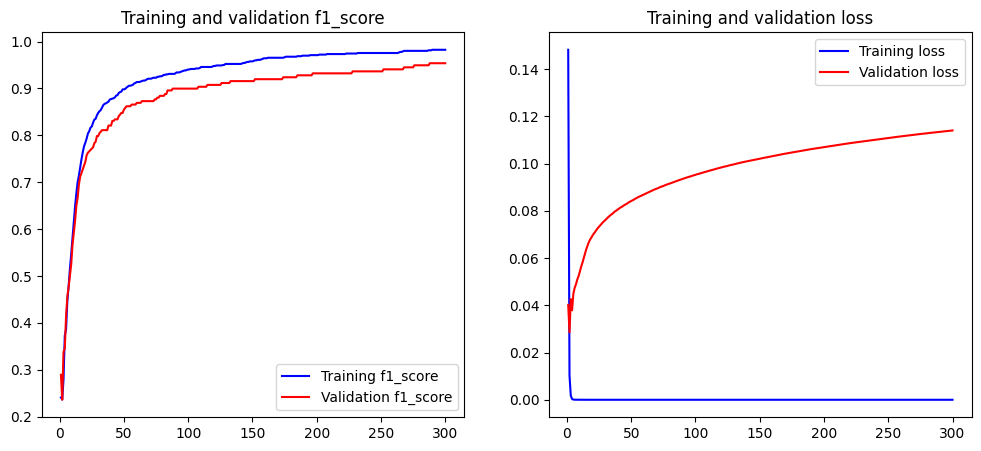

In [46]:
plot_history(history)

In [49]:
model = Sequential([
    tf.keras.layers.Dense(100, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=[F1Score()]
)

history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/200
52/52 [==============================] - 2s 23ms/step - loss: 0.2499 - f1_score: 0.2244 - val_loss: 0.0716 - val_f1_score: 0.2234
Epoch 2/200
52/52 [==============================] - 1s 11ms/step - loss: 0.0389 - f1_score: 0.2244 - val_loss: 0.0390 - val_f1_score: 0.2234
Epoch 3/200
52/52 [==============================] - 0s 8ms/step - loss: 0.0218 - f1_score: 0.2244 - val_loss: 0.0306 - val_f1_score: 0.2234
Epoch 4/200
52/52 [==============================] - 0s 9ms/step - loss: 0.0152 - f1_score: 0.2244 - val_loss: 0.0278 - val_f1_score: 0.2234
Epoch 5/200
52/52 [==============================] - 0s 8ms/step - loss: 0.0111 - f1_score: 0.2244 - val_loss: 0.0257 - val_f1_score: 0.2234
Epoch 6/200
52/52 [==============================] - 0s 8ms/step - loss: 0.0082 - f1_score: 0.2244 - val_loss: 0.0236 - val_f1_score: 0.2234
Epoch 7/200
52/52 [==============================] - 0s 9ms/step - loss: 0.0061 - f1_score: 0.2244 - val_loss: 0.0230 - val_f1_score: 0.2234
Epoch 8/200

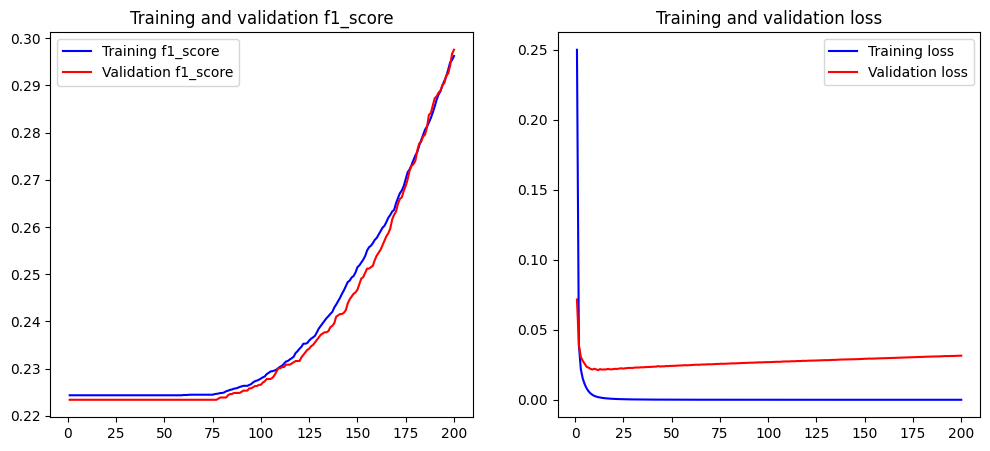

In [50]:
plot_history(history)